# Flow exploration

### Importing necessary libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from datetime import date, timedelta
from sklearn import datasets, linear_model

%matplotlib inline 
%matplotlib notebook

### Loading the data concerning the flow measurements

In [90]:
flow = pd.read_csv("/home/alicja/Documents/environments/jupyter_env/" + 'flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### Checking current data types of given data set

In [85]:
flow.dtypes

time    datetime64[ns]
flow           float64
dtype: object

### Making time column a datetime type

In [86]:
flow['time'] = pd.to_datetime(flow['time'], format='%Y-%m-%d %H:%M:%S')

### Showing updated data types

In [87]:
flow.dtypes

time    datetime64[ns]
flow           float64
dtype: object

### Basic statistical measurements showing the dispersion of the data

In [88]:
flow.describe()

,flow
count,255419.000000
mean,109.166087
std,23.698688
min,-253.750000
25%,95.860001
50%,112.879997
75%,123.250000
max,599.869995


### Making sure that the time is in a proper order

In [55]:
flow.sort_values('time')

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998
5,2015-06-01 14:40:00,113.389999
6,2015-06-01 14:45:00,113.699997
7,2015-06-01 14:50:00,113.680000
8,2015-06-01 14:55:00,113.839996
9,2015-06-01 15:00:00,113.570000


### Variable for empty values check out

In [68]:
s = (flow['flow'])

### Checking if there are empty values, there are no empty values found

In [69]:
s.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
255389    False
255390    False
255391    False
255392    False
255393    False
255394    False
255395    False
255396    False
255397    False
255398    False
255399    False
255400    False
255401    False
255402    False
255403    False
255404    False
255405    False
255406    False
255407    False
255408    False
255409    False
255410    False
255411    False
255412    False
255413    False
255414    False
255415    False
255416    False
255417    False
255418    False
Name: flow, Length: 2554

### Empty values then list only them

In [70]:
s[s.isnull()]

Series([], Name: flow, dtype: float64)

### If empty values the show their index, there are no empty values found

In [59]:
s.index[s.isnull()]

Int64Index([], dtype='int64')

### Flow density plot and histogram, one may notice the general pattern of the distribution of the data

<IPython.core.display.Javascript object>


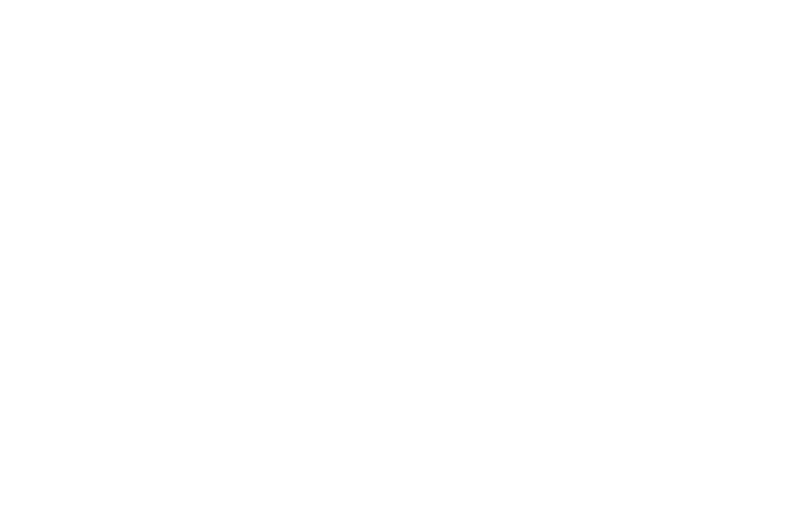

<IPython.core.display.Javascript object>


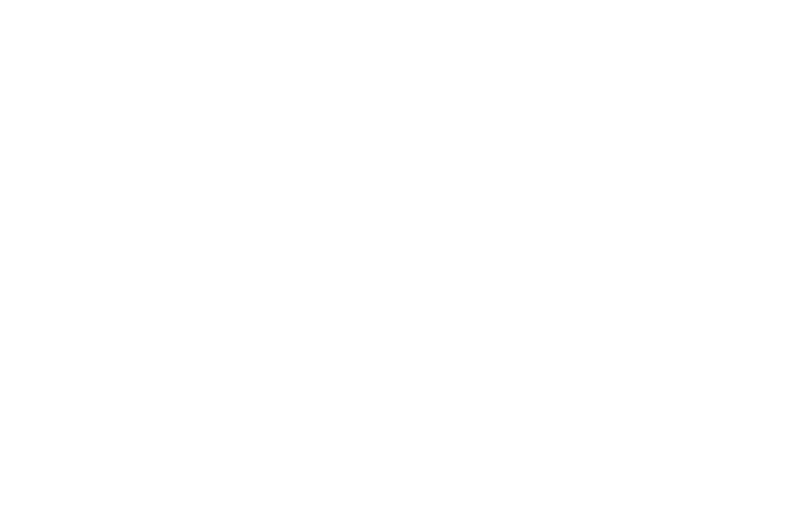

In [60]:
sns.distplot(flow["flow"], hist=True, kde=True, 
             bins=int(180/1), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

### Variables for plotting time against flow value

In [61]:
t = flow['time']
f = flow['flow']

### General plot

plotting all data at once giving the first impression of the data gathered, one may see the general pattern of the flow with few exceptions and fluctuations

<IPython.core.display.Javascript object>


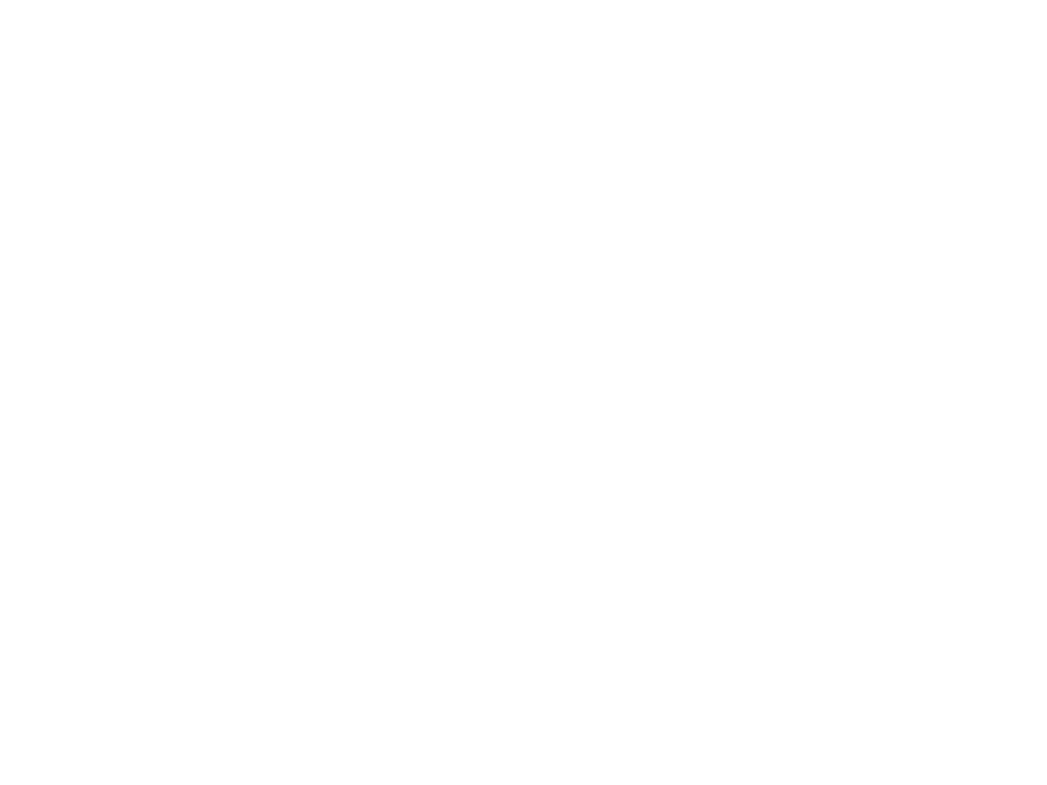

<IPython.core.display.Javascript object>


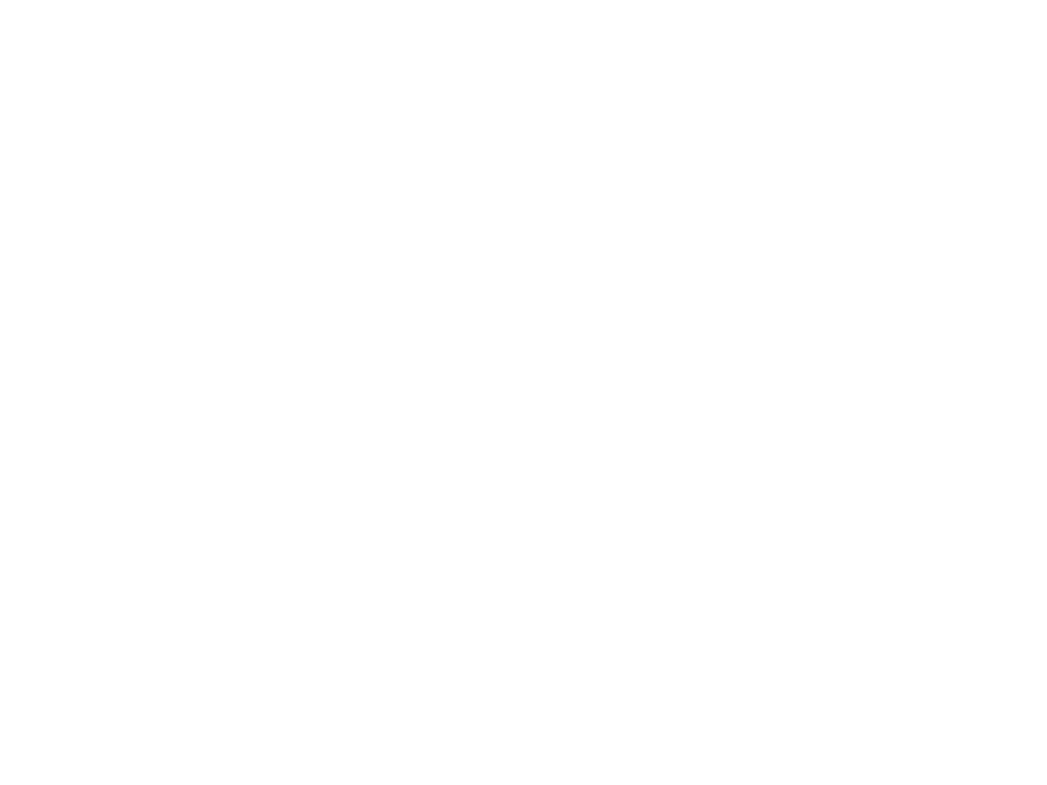

In [62]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(t,f)

### One year plot

plotting one year 2016, giving very general insight into the data, one may notice few outstanding anomalies during the year, additionally it may be observed that from March to April there is a general increase of the value of the flow in comparison to the rest of the year

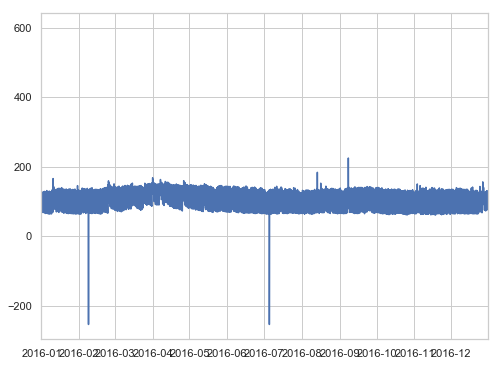

In [42]:
t = flow['time']
f = flow['flow']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 12, 31)])
ax.plot(t,f)

### One month plot

plotting one month in January 2016, showing with exceptions the recurring pattern of the flow 

<IPython.core.display.Javascript object>


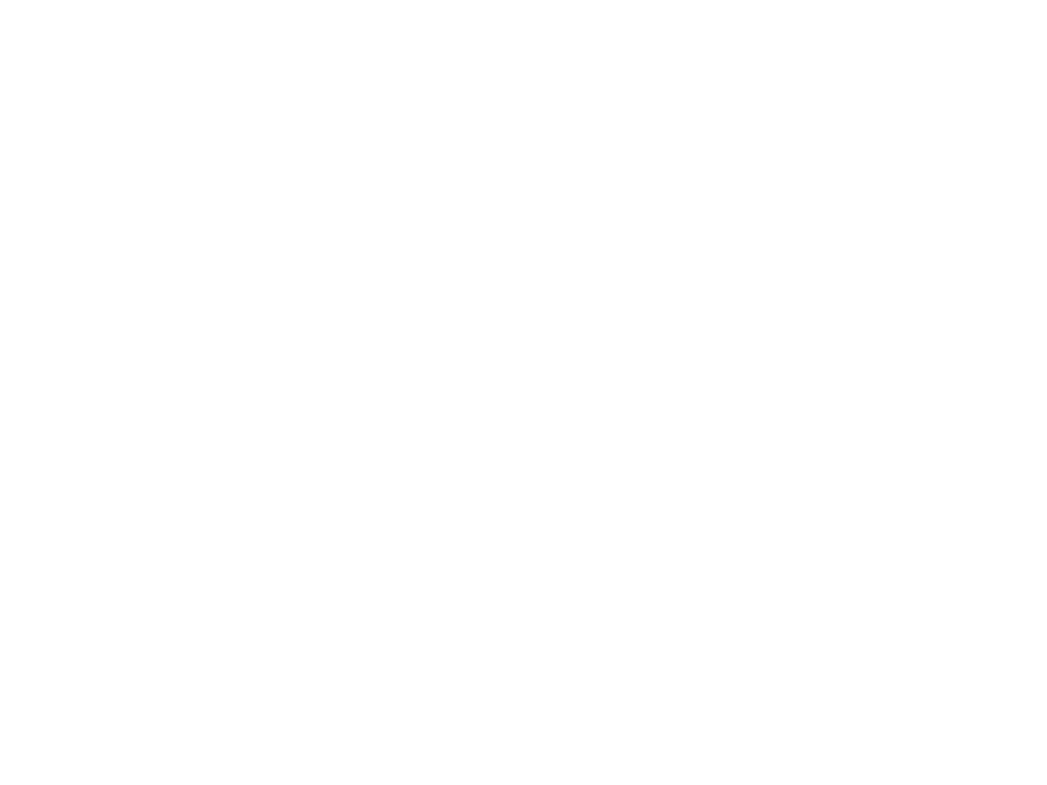

<IPython.core.display.Javascript object>


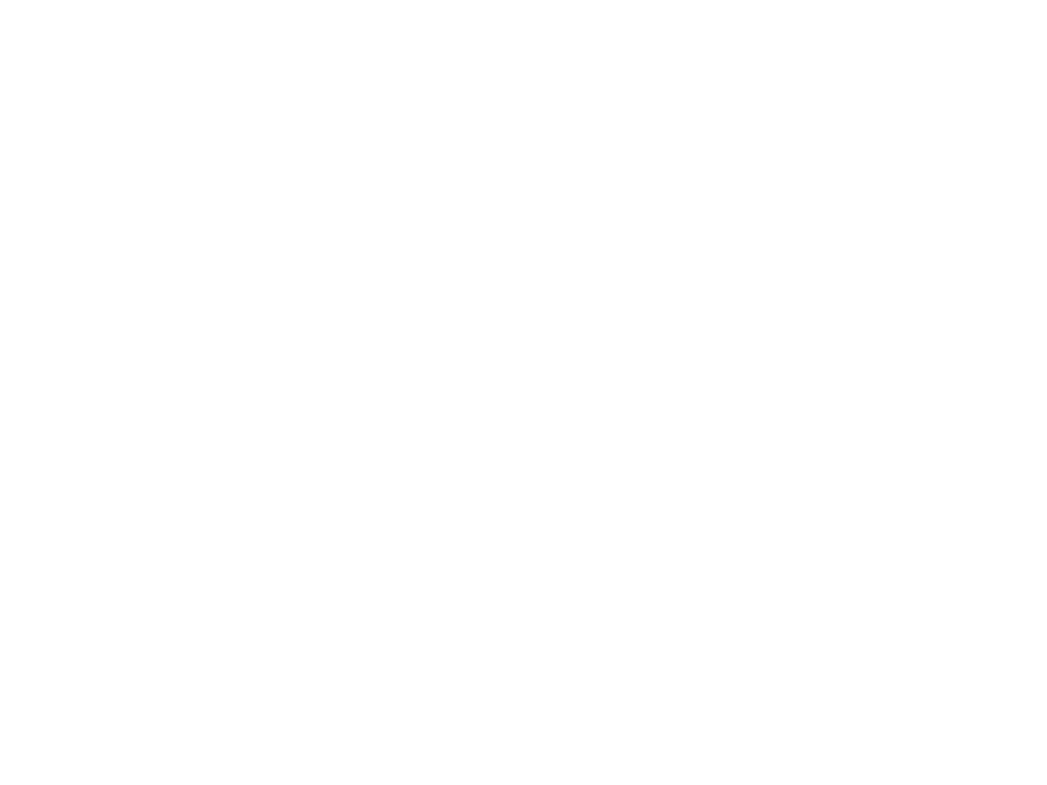

In [63]:
t = flow['time']
f = flow['flow']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 1, 31)])
ax.plot(t,f)

### Few days plot

plotting few days in January 2016, showing the general pattern and fluctuations of the data, where the lowest point is equal to approximately 70 and the highest to approximately 120

<IPython.core.display.Javascript object>


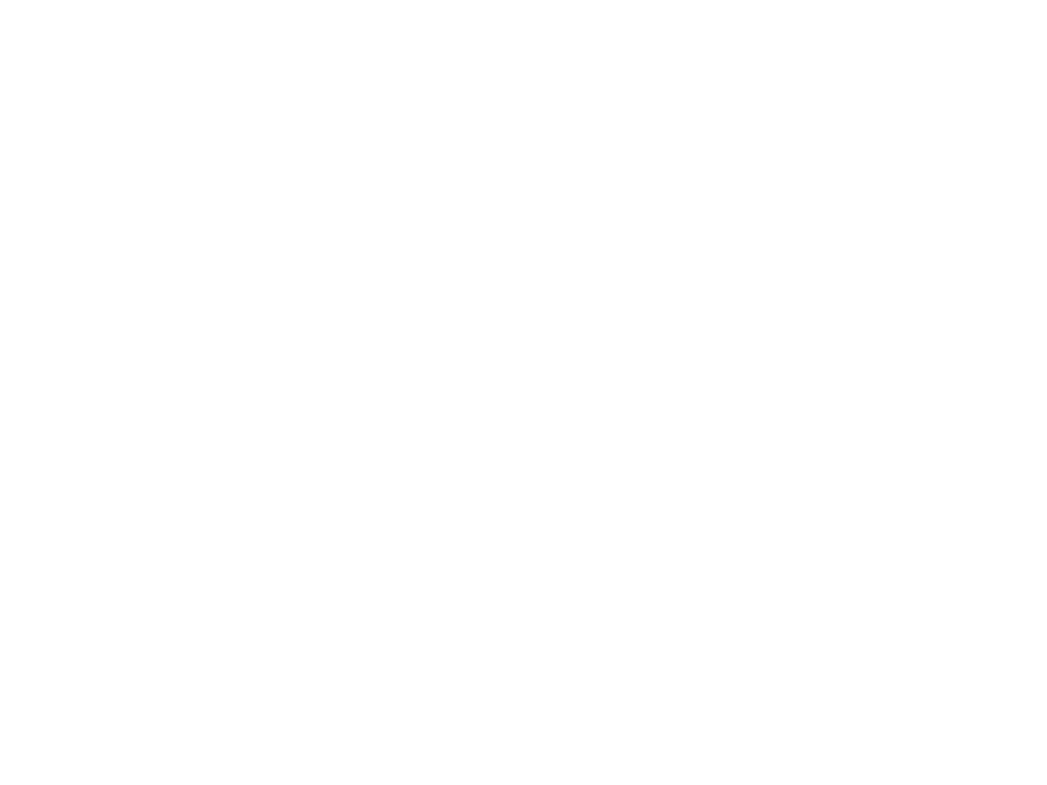

<IPython.core.display.Javascript object>


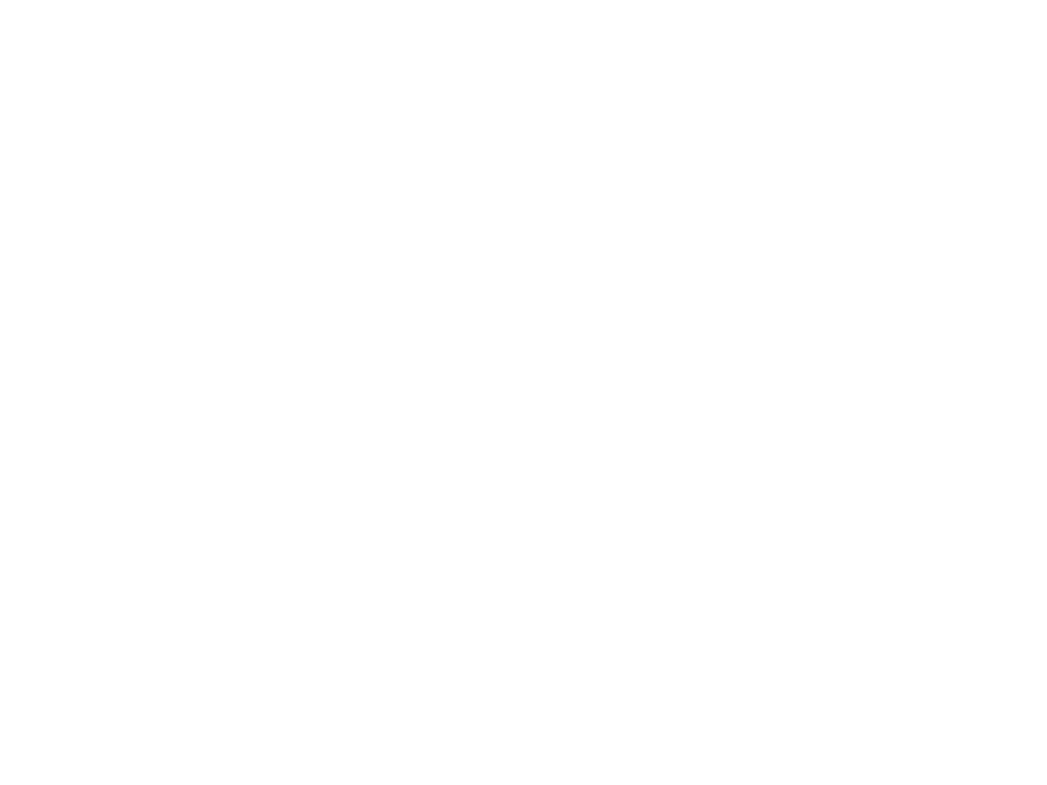

In [64]:
t = flow['time']
f = flow['flow']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 1, 6)])
ax.plot(t,f)

### One day plot

plotting one day in January 2016, showing the change in time of the flow depending on the time of day

<IPython.core.display.Javascript object>


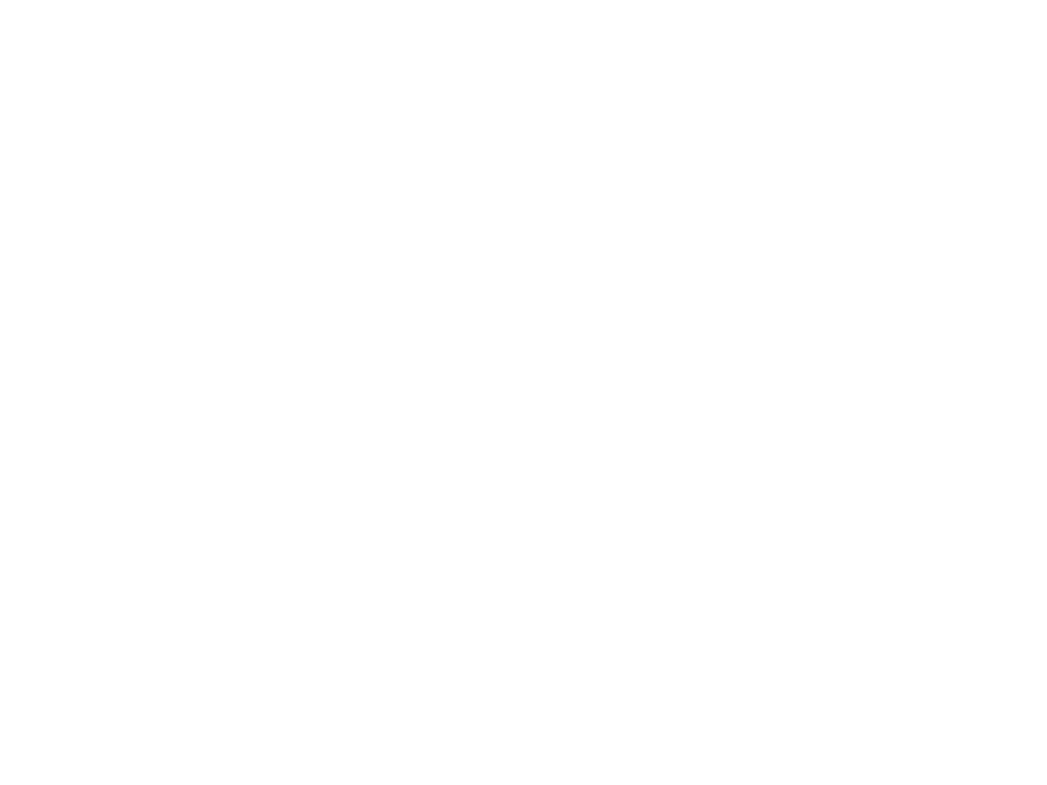

<IPython.core.display.Javascript object>


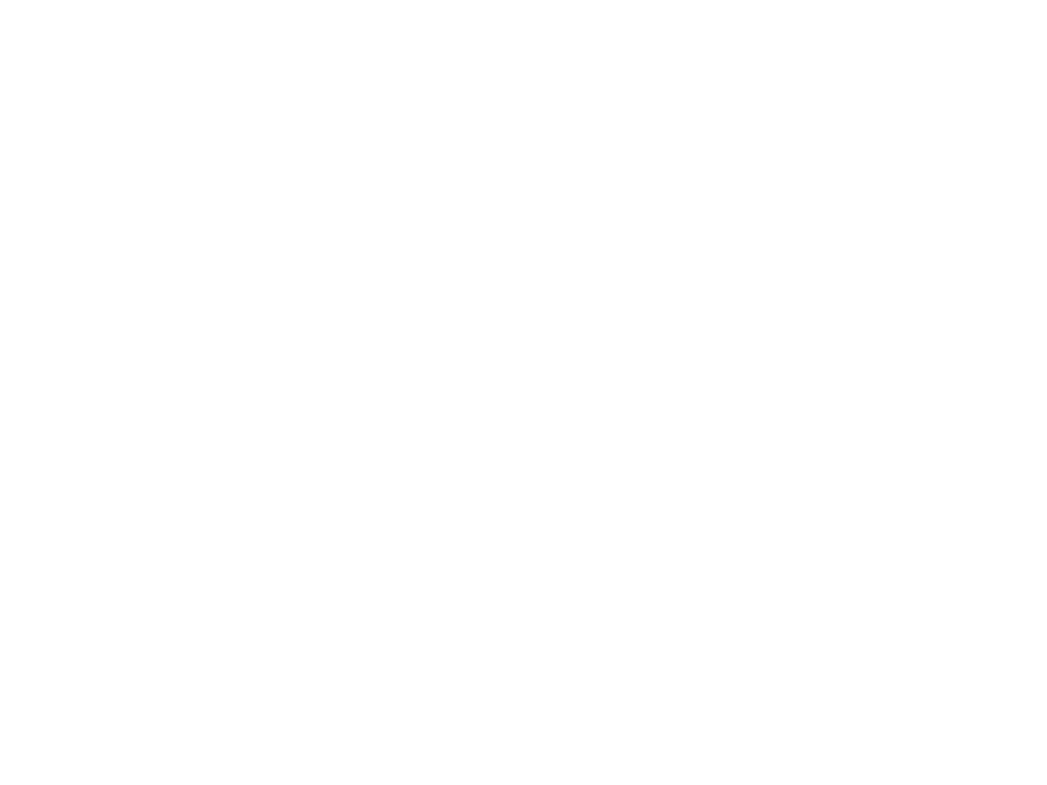

In [65]:
t = flow['time']
f = flow['flow']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 1, 2)])
ax.plot(t,f)

### Boxplot

on all available data showing the basic statistical measurements in a vivid picture. It can be noticed that the first quartile value is equal to approximately 90, the mean value to 110 and and third quartile to 120. This gives an insight that in general most of the data is not in extremes. There are individual exceptions like the value 599 or -250 which may be the result of anomaly or the broken sensor. 


<IPython.core.display.Javascript object>


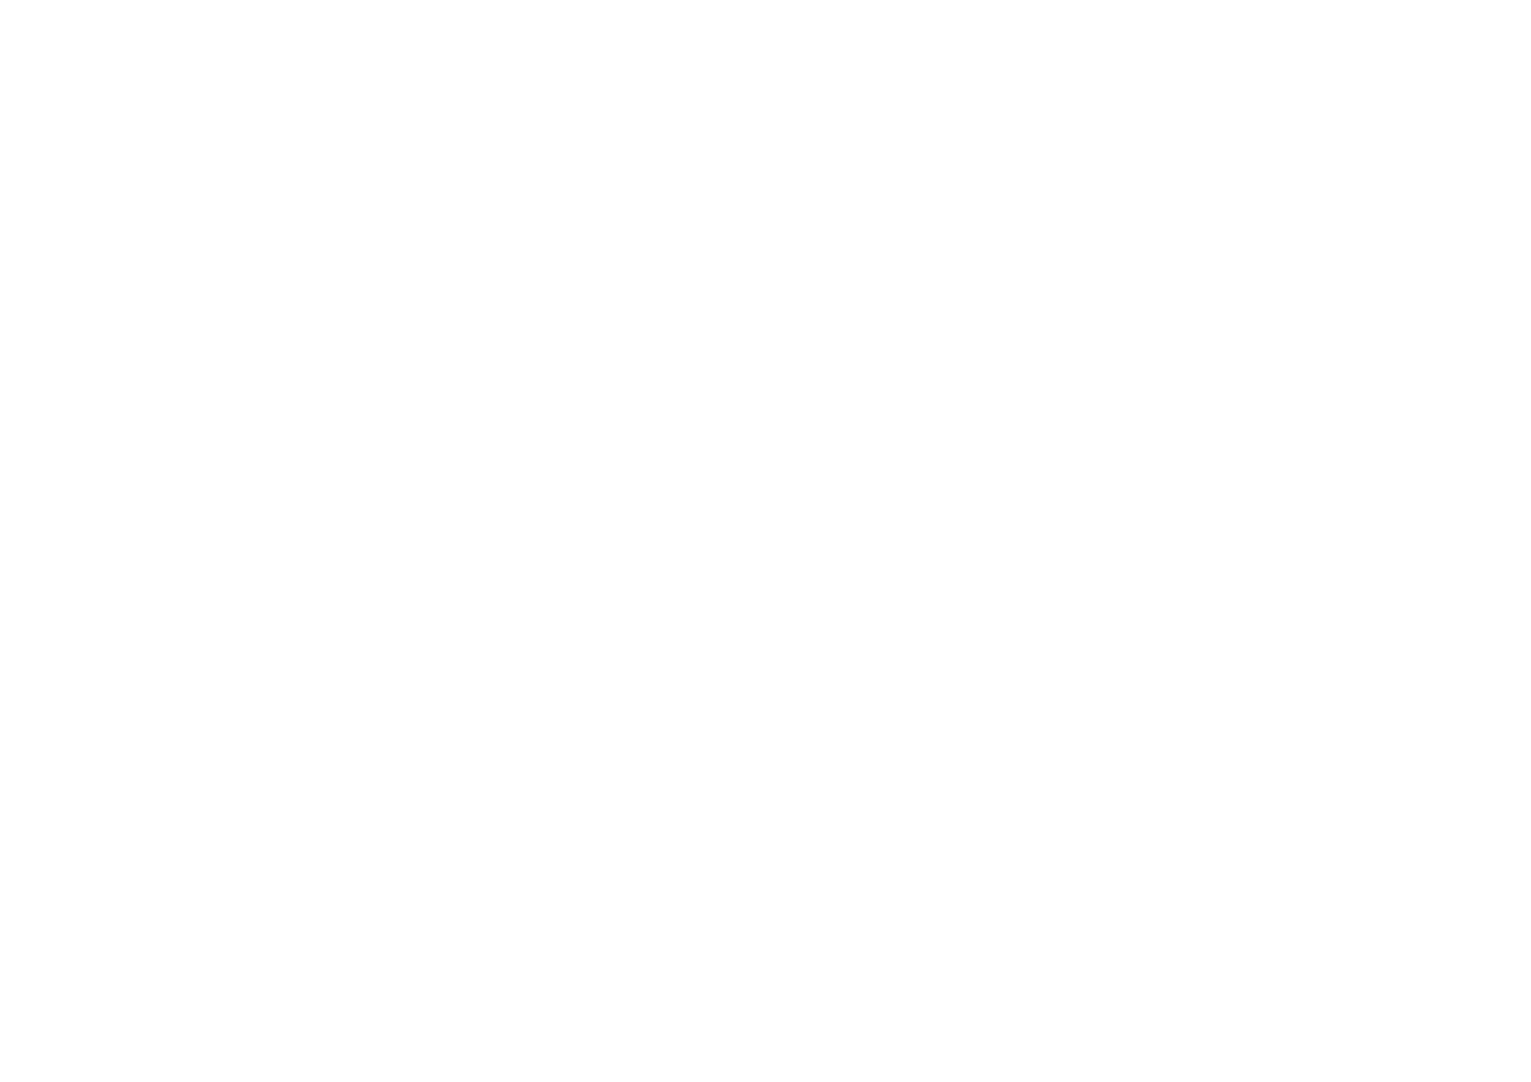

<IPython.core.display.Javascript object>


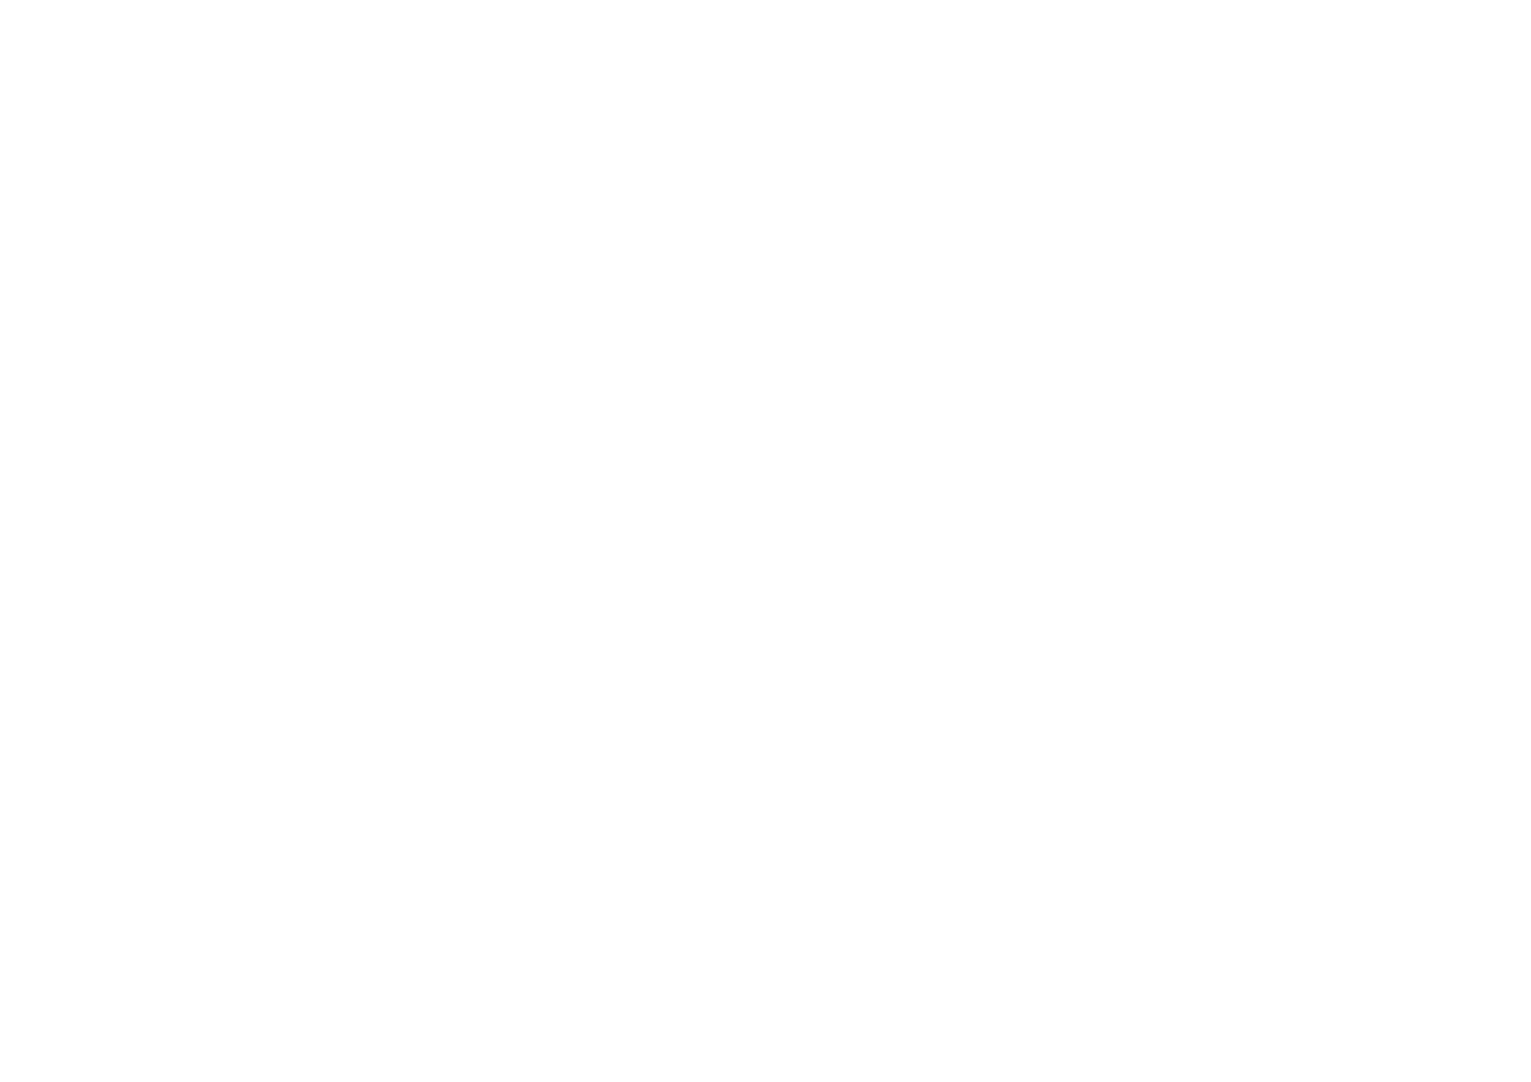

In [66]:
sns.set(style="whitegrid")
box = pd.read_csv("//home//alicja//Documents//environments//jupyter_env//flow1.csv")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x=box["flow"])